In [1]:
import numpy as np
import seaborn as sns
from tiles import TileCoding
import gym 

In [2]:
%matplotlib inline

In [3]:
class EpsilonGreedy:
    def __init__(self, values, epsilon, features):
        self.qvalues = values
        self.eps = epsilon
        self.features = features
        
    def sample(self, state):
        if np.random.uniform() < self.eps :
            return int(np.random.randint(self.qvalues.shape[1]))
        return np.argmax(self.qvalues[self.features(state), :].sum(axis=0))

In [4]:
env = gym.make('MountainCar-v0')

[2017-07-03 11:57:37,172] Making new env: MountainCar-v0


In [5]:
nruns = 50
nsteps = 1000
nepisodes = 350
gamma = 0.99
exploration = 0.05
learning_rate = 0.1

env._max_episode_steps = nsteps

allruns = []
for run in range(nruns):
    features = TileCoding(ntiling=10, memory_size=3000)
    qvalues = np.zeros((features.memory_size, env.action_space.n))
    policy = EpsilonGreedy(qvalues, exploration, features)

    learning_curve = []
    for ep in range(nepisodes):
        cumul_reward = 0.
        state = env.reset()
        action = policy.sample(state)

        for step in range(nsteps):
            #env.render()
            nextstate, reward, done, _ = env.step(action)
            nextaction = policy.sample(nextstate)

            # TD error
            tderror = reward - qvalues[features(state), action].sum()
            if not done:
                tderror += gamma*qvalues[features(nextstate), nextaction].sum()

            # TD update
            qvalues[features(state), action] += (learning_rate/features.ntiling)*tderror

            # SARSA housekeeping
            state, action = nextstate, nextaction

            cumul_reward += reward
            if done:
                break
                
        #print("Episode {0} finished after {1} steps, undiscounted return {2}".format(ep, step+1, cumul_reward))                    
        learning_curve.append(cumul_reward)
    allruns.append(learning_curve)                

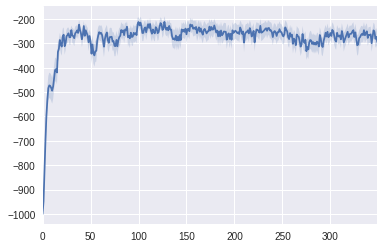

In [6]:
sns.tsplot(allruns)